In [2]:
import pandas as pd
import numpy as np

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

In [3]:
dados = pd.read_csv("desafio1.csv")

In [4]:
dados = dados[['pontuacao_credito', 'estado_residencia']]

In [18]:
dados

,pontuacao_credito,estado_residencia
0,619,SC
1,608,RS
2,502,SC
3,699,SC
4,850,RS
...,...,...
6995,633,SC
6996,623,RS
6997,611,SC
6998,666,RS


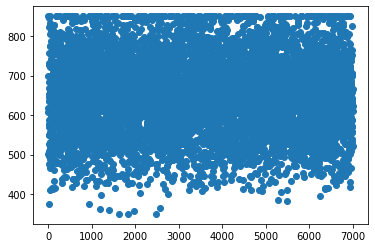

In [8]:
import matplotlib.pyplot as plt

plt.scatter(list(range(len(dados.pontuacao_credito))),dados.pontuacao_credito)

In [17]:
from scipy import stats

respostas = []

for estado in set(dados.estado_residencia):
    dado_estado = dados.loc[dados.estado_residencia == estado]
    print(len(dado_estado))
    
    moda = dado_estado.pontuacao_credito.value_counts()
    moda = moda.index[0]
    valores = np.asarray(dado_estado.pontuacao_credito)
    media = np.mean(valores)
    mediana = np.median(sorted(valores))
    desv = np.std(valores)
    av = np.average(valores)
    mod = stats.mode(valores)

    
    lista = []
    lista.append(estado)
    lista.append([moda,mediana,media,desv])
    
    respostas.append(lista)
    print(media, mediana, moda, desv)

1750
651.1051428571428 650.0 850 95.10941264433832
1731
648.9612940496822 650.0 850 98.57869907560782
3519
649.5376527422563 653.0 850 97.21967631126118


In [6]:
modelo_resp = pd.read_json("submission.json")

In [7]:
modelo_resp

,SC,RS,PR
moda,0,0,0
mediana,0,0,0
media,0,0,0
desvio_padrao,0,0,0


In [22]:
len(respostas)

3

In [27]:
teste = pd.DataFrame()

In [28]:
for i in range(len(respostas)):
    teste[respostas[i][0]] = respostas[i][1]

In [33]:
teste.rename(index={0:'moda',1:'mediana',2:'media',3:'desvio_padrao'}, inplace = True)

In [34]:
teste

,RS,SC,PR
moda,850.000000,850.000000,850.000000
mediana,650.000000,653.000000,650.000000
media,651.105143,649.537653,648.961294
desvio_padrao,95.109413,97.219676,98.578699


In [35]:
teste.to_json("subteste.json")